In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Import own code
from algorithms import compare_data_to_success_condition, get_sensitivity_specificity_compiled_v1
from signal_data_class import SignalData
from plot_data import plot_inv_frac, plot_all_3d, plot_misfires, plot_roc_curve

sb.set()

SN1 = "../data/SN1_Chirp_300kHzTemplate_0p16SNR_280Start_Sig.npy"  # Nasty noise
SN2 = "../data/SN2_Chirp_300kHzTemplate_0p32SNR_280Start_Sig.npy"  # Nice noise
SX1 = "../data/SX1_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_99mV.npy"
SX2 = "../data/SX2_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_132mV.npy"
SX3 = "../data/SX3_ChirpSig_ChirpTemplate_325p5kHz_3p45e8Grad_1024pt_264mV.npy"
XN1 = "../data/XN1_Chirp_300kHzTemplate_0p16SNR_280Start_Noise.npy"  # Nasty noise
XN2 = "../data/XN2_Chirp_300kHzTemplate_0p32SNR_280Start_Noise.npy"  # Nice noise


In [2]:
data = {}
# data["SN1"] = np.array(list( zip(*np.load(SN1)) ))
# data["SN2"] = np.array(list( zip(*np.load(SN2)) ))
data["SX1"] = np.array(list( zip(*np.load(SX1)) ))
# data["SX2"] = np.array(list( zip(*np.load(SX2)) ))
# data["SX3"] = np.array(list( zip(*np.load(SX3)) ))
# data["XN1"] = np.array(list( zip(*np.load(XN1)) ))
data["XN2"] = np.array(list( zip(*np.load(XN2)) ))

# df = pd.read_csv("../data/SX1+XN1.csv")
# data["SX1+XN1"] = [df.t, df.signal]
df = pd.read_csv("../data/SX1+XN2.csv")
data["SX1+XN2"] = [df.t, df.signal]

SX1_truth_data_df = pd.read_csv("../data/SX1_truth_data.csv")
# SX1_truth_data = list(SX1_truth_data_df.truth_data)
SX1_truth_data = SX1_truth_data_df.truth_data


In [3]:
print(data["SX1+XN2"][0][:10])

0    0.000000
1    0.000001
2    0.000002
3    0.000003
4    0.000004
5    0.000005
6    0.000006
7    0.000007
8    0.000008
9    0.000009
Name: t, dtype: float64


In [4]:
# t3_pd_analyse = pd.read_csv("t3_performance_data.csv.temp")
# plot_all_3d(t3_pd_analyse, title="SX1+XN2 with SX1 truth data performance, full range, zd2")

# t8_pd_analyse = pd.read_csv("t8_performance_data.csv.temp")
# plot_misfires(t8_pd_analyse, title="XN2 (just noise), 0.32 SNR")
# print()


In [5]:
time = data["SX1+XN2"][0]
signal = data["SX1+XN2"][1]
truth_data = SX1_truth_data

sigdat = SignalData(time, signal, truth_data=truth_data)
sigdat.get_sensitivity_specificity_v1()


(0.28429423459244535, None)

In [6]:
time = np.concatenate(( data["SX1+XN2"][0], data["XN2"][0] ))
signal = np.concatenate(( data["SX1+XN2"][1], data["XN2"][1] ))
truth_data = np.concatenate(( SX1_truth_data, np.zeros_like(data["XN2"][0]) ))

sigdat_combo = SignalData(time, signal, truth_data=truth_data)
sigdat_combo.get_sensitivity_specificity_v1()


(0.28429423459244535, 0.07774086378737542)

In [7]:
inv_frac_vals = np.arange(1, 6, 1)
delay_samples_vals = np.arange(50, 250, 50)

u1_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        verbose = True,
                                       )

u1_pd = pd.DataFrame(u1_roc_data)  # Faster to pass list of dicts than to add rows iteratively
u1_pd.to_csv("u1_roc_data.csv.temp")


....
....
Wall time: 57 secs
CPU time: 20 secs


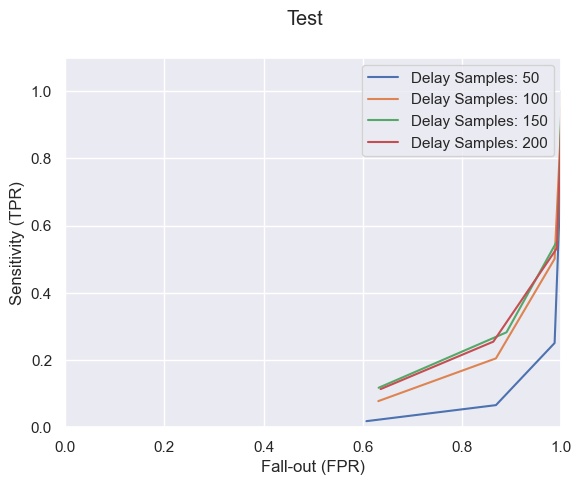

,Unnamed: 0,sensitivity,specificity,inv_frac,delay_samples
0,0,1.000000,0.000000,1,50
3,3,0.065606,0.131561,4,50
2,2,0.250497,0.013289,3,50
4,4,0.017893,0.392691,5,50
1,1,0.777336,0.000000,2,50
9,9,0.077535,0.368771,5,100
5,5,0.994036,0.000000,1,100
7,7,0.500994,0.013289,3,100
8,8,0.204771,0.131561,4,100
6,6,0.910537,0.000000,2,100


In [8]:
u1_pd_analyse = pd.read_csv("u1_roc_data.csv.temp")
plot_roc_curve(u1_pd_analyse, title="Test")
print()
u1_pd_analyse.sort_values(by=["delay_samples"]).head(100)


In [9]:
inv_frac_vals = np.arange(0, 15, 0.5)
delay_samples_vals = np.arange(0, 300, 25)

u2_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        verbose = True,
                                       )

u2_pd = pd.DataFrame(u2_roc_data)  # Faster to pass list of dicts than to add rows iteratively
u2_pd.to_csv("u2_roc_data.csv.temp")


............
............
Wall time: 2 hours, 8 mins, 36 secs
CPU time: 7 mins, 53 secs


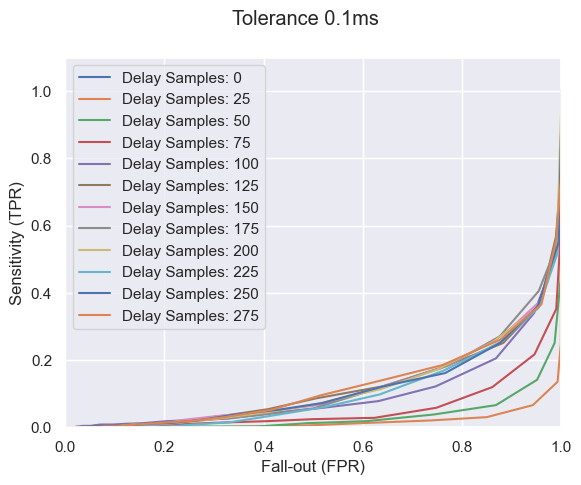

In [10]:
u2_pd_analyse = pd.read_csv("u2_roc_data.csv.temp")
plot_roc_curve(u2_pd_analyse, title="Tolerance 0.1ms")
print()


In [11]:
inv_frac_vals = np.arange(0, 15, 1)
delay_samples_vals = np.arange(0, 150, 25)

u3_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        tolerance = 300e-6,
                                        verbose = True,
                                       )

u3_pd = pd.DataFrame(u3_roc_data)  # Faster to pass list of dicts than to add rows iteratively
u3_pd.to_csv("u3_roc_data.csv.temp")


......
......
Wall time: 4 mins, 1 sec
CPU time: 1 min, 39 secs


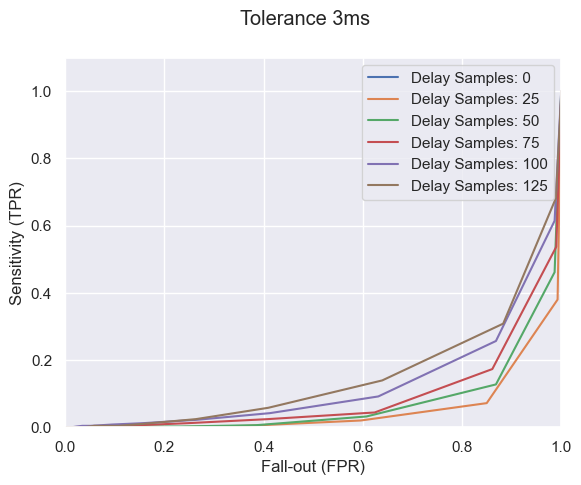

In [12]:
u3_pd_analyse = pd.read_csv("u3_roc_data.csv.temp")
plot_roc_curve(u3_pd_analyse, title="Tolerance 3ms")
print()


In [13]:
inv_frac_vals = np.arange(0, 15, 1)
delay_samples_vals = np.arange(0, 150, 25)

u4_roc_data = sigdat_combo.get_roc_curve_data(inv_frac_vals = inv_frac_vals,
                                        delay_samples_vals = delay_samples_vals,
                                        tolerance = 2e-3,
                                        verbose = True,
                                       )

u4_pd = pd.DataFrame(u4_roc_data)  # Faster to pass list of dicts than to add rows iteratively
u4_pd.to_csv("u4_roc_data.csv.temp")


......
......
Wall time: 57 mins, 58 secs
CPU time: 1 min, 48 secs


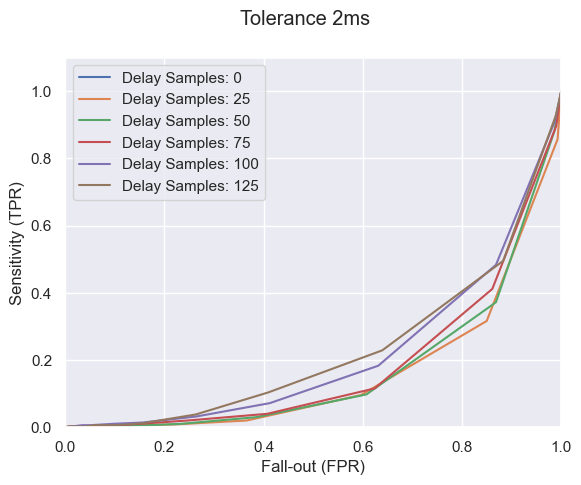

In [14]:
u4_pd_analyse = pd.read_csv("u4_roc_data.csv.temp")
plot_roc_curve(u4_pd_analyse, title="Tolerance 2ms")
print()


In [15]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# u4_pd_analyse.head(100)
